In [2]:
from urllib.parse import urljoin
import requests
import time
import pandas as pd

# base URL for GET request to obtain trade data
BASEURL = 'https://api.bitfinex.com/v2/trades/'
# coin pair to obtain trades for
SYMBOL = 'tEOSUSD'
# number of trades to obtain per query
LIMIT = 1000
# number of total requests to send
REQUESTS = 10
# time between requests in seconds
WAIT = 360

# default value -> get the latest trades
last_timestamp = 0
successful_requests = 0
trades = []
for _ in range(REQUESTS):
    url = urljoin(BASEURL, f'{SYMBOL}/hist')
    query_time = time.time()
    # get <LIMIT> trades since last timestamp
    print(url)
    response = requests.get(url,
                            params={'limit': LIMIT,
                                    'start': last_timestamp})
    # if the request was successful, update data
    if response.status_code == 200:
        print('Request successful')
        successful_requests += 1
        trade_data = pd.DataFrame(response.json(),
                                  columns=['ID', 'MTS', 'AMOUNT', 'PRICE'])
        print(f'{len(trade_data)} trades since last timestamp')
        last_timestamp = max(trade_data['MTS'])
        trades.append(trade_data)
        # make sure we adhere to <WAIT> period
        timedelta = time.time() - query_time
        if timedelta < WAIT:
            time.sleep(WAIT - timedelta)

print(f'Completed {successful_requests} requests successfully')

all_trades = pd.concat(trades)

print(all_trades)


https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
1000 trades since last timestamp
https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
183 trades since last timestamp
https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
64 trades since last timestamp
https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
223 trades since last timestamp
https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
218 trades since last timestamp
https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
300 trades since last timestamp
https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
282 trades since last timestamp
https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
102 trades since last timestamp
https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
143 trades since last timestamp
https://api.bitfinex.com/v2/trades/tEOSUSD/hist
Request successful
136 trades since last timestamp
Completed 

Text(0,0.5,'Amount')

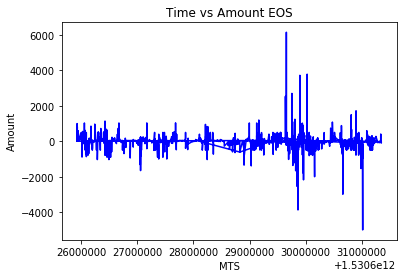

In [4]:
import matplotlib.pyplot as plt

plt.plot(all_trades['MTS'], all_trades['AMOUNT'], color="blue")
plt.title("Time vs Amount EOS")
plt.xlabel("MTS")
plt.ylabel("Amount")

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 1.000e+01,
        1.100e+01, 1.700e+01, 1.200e+01, 2.400e+01, 1.170e+02, 6.000e+01,
        1.080e+02, 1.830e+02, 1.006e+03, 6.000e+02, 1.770e+02, 1.140e+02,
        5.500e+01, 7.900e+01, 1.000e+01, 1.000e+01, 9.000e+00, 1.100e+01,
        1.000e+01, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+0

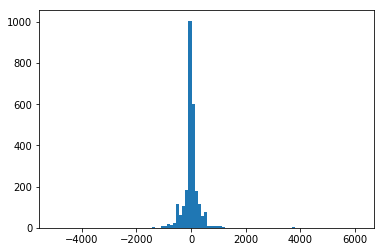

In [11]:
plt.hist(all_trades['AMOUNT'], bins=100)
